# Language Analysis: Venezuela
Analyzing the language of **accounts and tweets** identified by Twitter to be associated with the country's information operations.

In [12]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
import langdetect
from collections import Counter
import iso639 as pylang

In [2]:
filename = '../Data/bangladesh_201901_1_tweets_csv_hashed.csv'

In [3]:
# Import dataset
ban = pd.read_csv(filename, dtype = {
    "tweetid": str,
    "userid": str,
    "user_display_name": str,
    "user_screen_name": str,
    "user_reported_location": str,
    "user_profile_description": str,
    "user_profile_url": str,
    "follower_count": str,
    "following_count": str,
    "account_creation_date": str,
    "account_language": str,
    "tweet_text": str,
    "tweet_time": str,
    "tweet_client_name": str,
    "in_reply_to_tweetid": str,
    "in_reply_to_userid": str,
    "quoted_tweet_tweetid": str,
    "is_retweet": bool,
    "retweet_userid": str,
    "retweet_tweetid": str,
    "latitude": str,
    "longitude": str,
    "quote_count": str,
    "reply_count": str,
    "like_count": str,
    "retweet_count": str,
    "hashtags": str,
    "urls": str,
    "user_mentions": str,
    "poll_choices": str,
})

In [4]:
print(len(ban))

26214


In [5]:
ban.columns

Index(['tweetid', 'userid', 'user_display_name', 'user_screen_name',
       'user_reported_location', 'user_profile_description',
       'user_profile_url', 'follower_count', 'following_count',
       'account_creation_date', 'account_language', 'tweet_text', 'tweet_time',
       'tweet_client_name', 'in_reply_to_tweetid', 'in_reply_to_userid',
       'quoted_tweet_tweetid', 'is_retweet', 'retweet_userid',
       'retweet_tweetid', 'latitude', 'longitude', 'quote_count',
       'reply_count', 'like_count', 'retweet_count', 'hashtags', 'urls',
       'user_mentions', 'poll_choices'],
      dtype='object')

## Tweet Language Summary

In [6]:
# Sample data of tweets / their detected language
for elem in ban.head(5)['tweet_text']:
    print(elem)
    print(langdetect.detect(elem))
    print()

হকিতে তিনি নেই, তিনি আছেন https://t.co/sAMErcn3OF
bn

মুম্বাই চলচ্চিত্রের অঘটনঘটনপটিয়সীদের কথা বললে.. সালমান খানের নাম আসবেই। আর বলিউডের... https://t.co/CQaa7w0DpA
bn

ডাকসু নিয়ে ছাত্র নেতাদের সঙ্গে রোববার আলোচনায় বসবে ঢাবি প্রশাসন https://t.co/D3ZbQUZ4gD
bn

ব্রাহ্মণবাড়িয়ায় স্বামীকে হত্যার দায়ে স্ত্রীসহ ৪ জনের মৃত্যুদণ্ড https://t.co/SzW84Pfewz
bn

র‌্যাবের বৈশাখে পালকিতে চড়ে মঞ্চে এলেন স্বরাষ্ট্রমন্ত্রী https://t.co/wLSX6f2Jti
bn



In [7]:
# Detect language of tweets & store in a list
tweet_languages = []
for tweet_text in ban['tweet_text']:
    lang = langdetect.detect(elem)
    tweet_languages.append(lang)

In [33]:
# Get counts of each language
tweet_languages_count = Counter(tweet_languages)
print(tweet_languages_count)

Counter({'bn': 26214})


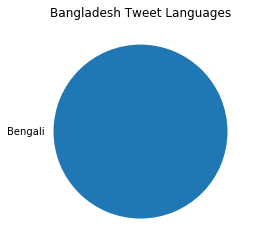

In [35]:
# Plot language counts
tweet_lang_types = []
tweet_lang_counts = []
for lang in tweet_languages_count:
    tweet_lang_types.append(lang)
    count = tweet_languages_count[lang]
    tweet_lang_counts.append(count)

tweet_lang_types_long = []
for lang in tweet_lang_types:
    lang_long = pylang.languages.get(alpha2 = lang).name
    tweet_lang_types_long.append(lang_long)
    
pyplot.pie(tweet_lang_counts, labels = tweet_lang_types_long)
pyplot.title('Bangladesh Tweet Languages')
pyplot.show()

## Account Language Summary

In [18]:
# Sample data of account languages
for elem in ban.head(5)['account_language']:
    print(elem)

en
en
en
en
en


In [31]:
# Get counts of each language
languages_count = Counter(ban['account_language'])
print(languages_count)

Counter({'en': 26214})


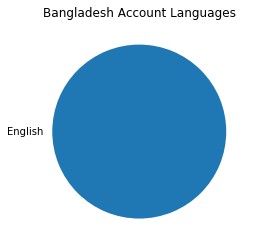

In [32]:
# Plot language counts
lang_types = []
lang_counts = []
for lang in languages_count:
    lang_types.append(lang)
    count = languages_count[lang]
    lang_counts.append(count)

lang_types_long = []
for lang in lang_types:
    lang_long = pylang.languages.get(alpha2 = lang).name
    lang_types_long.append(lang_long)
    
pyplot.pie(lang_counts, labels = lang_types_long)
pyplot.title('Bangladesh Account Languages')
pyplot.show()